In [4]:
import os
DATASET_DIR = '../01_data'

In [56]:
import json
with open(os.path.join(DATASET_DIR, 'neuron_ids.json')) as f:
    neuron_ids = json.load(f)
    
dust_neurons = list(set(neuron_ids['valid']).difference( set(neuron_ids['valid_20000'])))

print('number of dust neurons: ', len(dust_neurons))



neuron_ids['dust'] = dust_neurons

dust_neurons

number of dust neurons:  42


[82564,
 83078,
 81159,
 81160,
 81165,
 79125,
 82455,
 77080,
 76569,
 82458,
 82459,
 76965,
 78758,
 76968,
 78763,
 77871,
 78767,
 80692,
 78780,
 79039,
 77252,
 82374,
 76486,
 79686,
 78411,
 79437,
 77521,
 82642,
 82648,
 82520,
 82522,
 82521,
 76381,
 82525,
 76385,
 81121,
 82659,
 76388,
 82664,
 78455,
 81144,
 82942]

In [59]:
with open(os.path.join(DATASET_DIR, 'atlas/nblast/neuron_groups.json')) as f:
    neuron_groups = json.load(f)
    
identified_neurons = neuron_groups['anatomically_identified']

print('identified neuron number: ', len(identified_neurons))

new_groups = dict()
new_groups['anatomically_identified'] = identified_neurons
new_groups['dust'] = dust_neurons
new_groups['analysis'] = list(set(neuron_ids['valid_20000']).difference( set(identified_neurons) ))

with open(os.path.join(DATASET_DIR, 'neuron_groups.json'), 'w') as f:
    json.dump(new_groups, f)
    
    

identified neuron number:  15


In [61]:
neuron_groups = new_groups

In [25]:
import pandas as pd

df = pd.read_csv(os.path.join(DATASET_DIR, 'features.csv'))

print('total number of neurons: ', len(df))

In [77]:
row_mask = df['neuronId'].isin( neuron_groups['analysis'] )
df = df[row_mask]

print('number of neurons after masking: ', len(df))
# assert len(df) == len(neuron_groups['analysis']) - len(neuron_groups['anatomically_identified'])

number of neurons after masking:  3062


In [126]:
import bokeh
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import Range1d
 

output_notebook()



TOOLS="hover,reset,tap,save, box_select"

p = figure(tools=TOOLS)

presyn_num = df['preSynapseNum'].values 
postsyn_num = df['postSynapseNum'].values
p.scatter(presyn_num, postsyn_num)

# p.x_range = Range1d(0, presyn_num.max()+5)
# p.y_range = Range1d(0, postsyn_num.max()+10)
p.x_range = Range1d(0, 400)
p.y_range = Range1d(0, 1000)
p.xaxis.axis_label = 'presynapse number'
p.yaxis.axis_label = 'postsynpse number'
p.line(x=[20, 20], y=[0, 1000], color='red')
p.line(x=[0, 400], y=[20, 20], color='red')

# p.output_backend = "png"
show(p)

Loading BokehJS ...

In [157]:
# this neuron dendrite axon classification seems not correct
df.loc[2591]

neuronId                  8.218200e+04
totalPathLength           4.458510e+05
totalAxonPathLength       5.875423e+05
totalDendPathLength       1.306661e+03
rootRadius                4.797739e+02
averageTortuosity         1.349734e+00
asymmetry                 6.377156e+04
typicalRadius             4.386194e+04
numBranchingPoint         1.300000e+01
medianBranchPathLength    1.728503e+04
maxBranchPathLength       7.652246e+04
convexHullVolume          2.413821e+13
convexHullArea            5.079033e+09
surfaceArea               3.501027e+08
volume                    3.526801e+10
preSynapseNum             6.000000e+00
postSynapseNum            2.420000e+02
Name: 2591, dtype: float64

In [145]:
p = figure(tools=TOOLS)

# presyn_num = df['preSynapseNum'].values 
# postsyn_num = df['postSynapseNum'].values
# import numpy as np
# postsyn_num[postsyn_num == 0] = 0.1
# axon_score = presyn_num / postsyn_num

axon_length = df['totalAxonPathLength'].values/1000
dend_length = df['totalDendPathLength'].values/1000
# dend_length[ dend_length==0 ] = 0.1
axon_score = axon_length / dend_length

tortuosity = df['averageTortuosity'].values
path_length = df['totalPathLength'].values/1000
asymmetry = df['asymmetry'].values
root_radius = df['rootRadius'].values/1000

# p.scatter(np.log2(axon_score), np.log2(path_length))
p.scatter(np.log2(axon_score), root_radius)


# p.x_range = Range1d(0, 8)
# p.y_range = Range1d(0, 0.6)
p.xaxis.axis_label = 'log2(axon score)'
p.yaxis.axis_label = 'root radius (micron))'

# p.output_backend = "png"
show(p)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log2


In [146]:

p.scatter(np.log2(axon_length), np.log2(dend_length))
# p.scatter(axon_length, dend_length)


# p.x_range = Range1d(0, 8)
# p.y_range = Range1d(0, 0.6)
p.xaxis.axis_label = 'log2(axon path length)'
p.yaxis.axis_label = 'log2( dendrite path length )'

# p.output_backend = "png"
show(p)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


In [151]:
df.loc[2382]['neuronId']
# these should be axons
# df.loc[2012]['neuronId']
# df.loc[626]['neuronId']
# df.loc[1729]['neuronId']

81361.0

In [129]:
df.loc[1729]

neuronId                  7.976500e+04
totalPathLength           2.138487e+05
totalAxonPathLength       4.986112e+05
totalDendPathLength       1.000000e-01
rootRadius                3.744151e+02
averageTortuosity         1.387769e+00
asymmetry                 1.132206e+05
typicalRadius             4.884308e+04
numBranchingPoint         1.100000e+01
medianBranchPathLength    1.325523e+04
maxBranchPathLength       9.484613e+04
convexHullVolume          5.870755e+12
convexHullArea            3.063384e+09
surfaceArea               1.369549e+08
volume                    7.553638e+09
preSynapseNum             6.400000e+01
postSynapseNum            0.000000e+00
Name: 1729, dtype: float64

In [20]:
# normalize the dataframe
from sklearn import preprocessing

x = df.values #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

perplexity=5 takes 7.397408723831177 sec.
perplexity=10 takes 7.5711541175842285 sec.
perplexity=20 takes 8.00086760520935 sec.
perplexity=30 takes 8.474559545516968 sec.


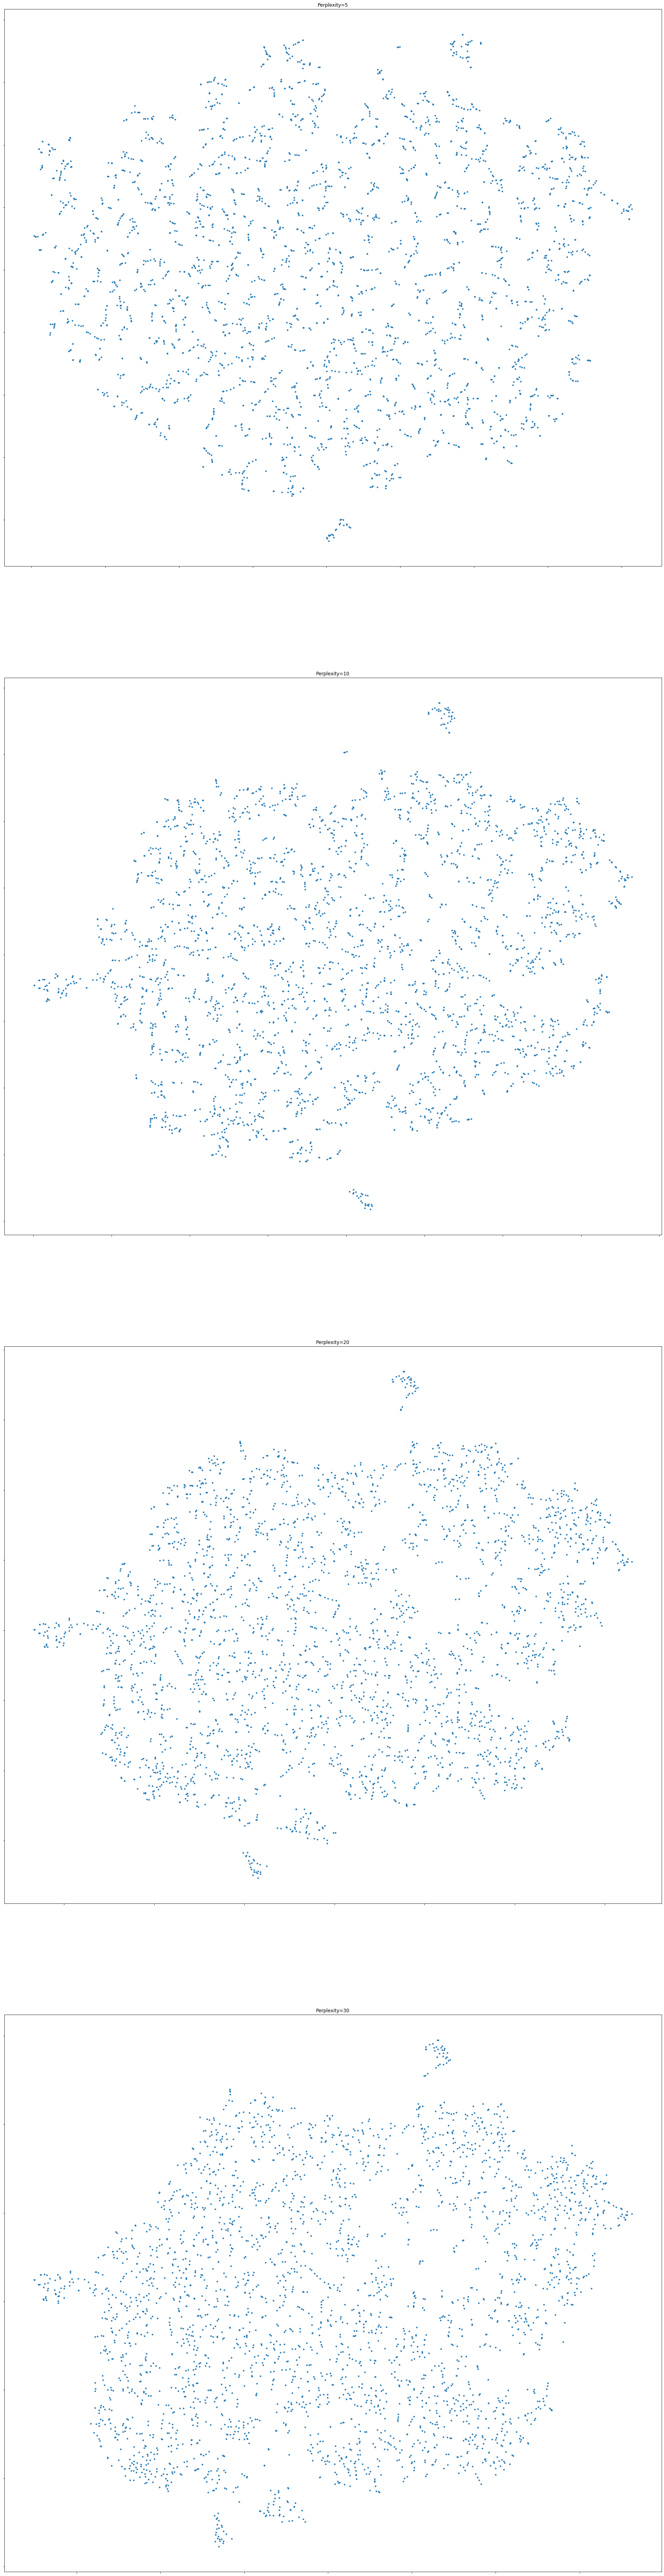

In [21]:
from sklearn import manifold
from matplotlib.ticker import NullFormatter
from time import time
import matplotlib.pylab as plt

X = df.values

perplexities = [5, 10, 20, 30]
# perplexities = [10, 20]

(fig, subplots) = plt.subplots(len(perplexities), figsize=(30, 120))

Ys = []
for i, perplexity in enumerate(perplexities):
    ax = subplots[i]
    
    t0 = time()
    tsne = manifold.TSNE(init='random', random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    Ys.append(Y)
    t1 = time()
    
    print(f'perplexity={perplexity} takes {(t1-t0)} sec.')
    
    ax.set_title(f'Perplexity={perplexity}')
    ax.scatter(Y[:,0], Y[:,1], marker='.')
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')